In [1]:
import utils.file as loader

path = "/home/cristian/Downloads/archive/AI_Human.csv"
columns = columns_to_read = ['text', 'generated']
#path = "/home/cristian/Downloads/2/data.csv"
#path = D:/Nicro/Downloads/archive/data.csv
#columns = columns_to_read = ['text', 'source']
file = loader.load_file(path, columns, balance=True)
print("file loaded correctly!")

AI count: 181438
Human count: 305797
I'll delete: 124359 from Human rows
file loaded correctly!


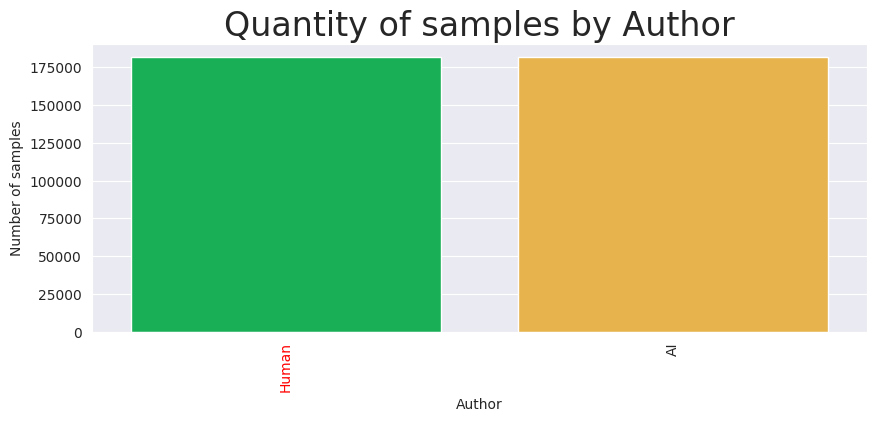

In [2]:
import utils.plots as view
view.countAllSamples(file, "generated_cor")

In [3]:
file['generated_cor'].value_counts()

generated_cor
AI       347692
Human    347692
Name: count, dtype: int64

In [3]:
from joblib import Parallel, delayed
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import gc

def run_pipeline(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred


def evaluate_model(model, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

def main():
    X = file['text']
    y = file['generated_cor']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    pipelines = [
        Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('clf', MultinomialNB())]),
        Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('clf', ComplementNB())]),
        Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('clf', DecisionTreeClassifier(max_depth=5))])
    ]

    results = Parallel(n_jobs=-1)(delayed(run_pipeline)(pipe, X_train, y_train, X_test) for pipe in pipelines)

    accuracies = []
    reports = []

    for i, result in enumerate(results):
        accuracy, report = evaluate_model(pipelines[i], y_test, result)
        accuracies.append(accuracy)
        reports.append(report)

        del result
        gc.collect() #test

    model_names = ["Multinomial Naive Bayes", "Complement Naive Bayes", "Decision Tree Classifier"]
    for i in range(len(model_names)):
        print(f"{model_names[i]}:")
        print(f"Accuracy: {accuracies[i] * 100:.2f}%")
        print("Classification Report:")
        print(reports[i])
        print()
    
main()

Multinomial Naive Bayes:
Accuracy: 95.54%
Classification Report:
              precision    recall  f1-score   support

          AI       0.97      0.94      0.95     36221
       Human       0.94      0.97      0.96     36355

    accuracy                           0.96     72576
   macro avg       0.96      0.96      0.96     72576
weighted avg       0.96      0.96      0.96     72576


Complement Naive Bayes:
Accuracy: 95.54%
Classification Report:
              precision    recall  f1-score   support

          AI       0.97      0.94      0.95     36221
       Human       0.94      0.97      0.96     36355

    accuracy                           0.96     72576
   macro avg       0.96      0.96      0.96     72576
weighted avg       0.96      0.96      0.96     72576


Decision Tree Classifier:
Accuracy: 78.69%
Classification Report:
              precision    recall  f1-score   support

          AI       0.84      0.70      0.77     36221
       Human       0.75      0.87      0